<a href="https://colab.research.google.com/github/mahsamir/CaseStudy-SVM/blob/master/Classification(SVC)_BreastCancer_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Breast Cancer Prediction**

**Predicting if the cancer diagnosis is benign or malignant considering several features**

  - radius (mean of distances from center to points on the perimeter)
  - texture (standard deviation of gray-scale values)
  - perimeter
  - area
  - smoothness (local variation in radius lengths)
  - compactness (perimeter^2 / area - 1.0)
  - concavity (severity of concave portions of the contour)
  - concave points (number of concave portions of the contour)
  - symmetry 
  - fractal dimension ("coastline approximation" - 1)

# Import Dataset and required libraries

In [58]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#import models from scikit learn module:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVC 

In [66]:
#importing our dataSet
from google.colab import files
uploaded = files.upload()

Saving Breast_cancer_data.csv to Breast_cancer_data (2).csv


In [67]:
import io
df_cancer = pd.read_csv(io.BytesIO(uploaded['Breast_cancer_data.csv']))
df_cancer.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,Benign
1,20.57,17.77,132.90,1326.0,0.08474,Benign
2,19.69,21.25,130.00,1203.0,0.10960,Benign
3,11.42,20.38,77.58,386.1,0.14250,Benign
4,20.29,14.34,135.10,1297.0,0.10030,Benign


## **Get some information about our dataset**

In [68]:
df_cancer.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
count,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360
std,3.524049,4.301036,24.298981,351.914129,0.014064
min,6.981000,9.710000,43.790000,143.500000,0.052630
25%,11.700000,16.170000,75.170000,420.300000,0.086370
50%,13.370000,18.840000,86.240000,551.100000,0.095870
75%,15.780000,21.800000,104.100000,782.700000,0.105300
max,28.110000,39.280000,188.500000,2501.000000,0.163400


In [69]:
df_cancer.info

<bound method DataFrame.info of      mean_radius  mean_texture  ...  mean_smoothness  diagnosis
0          17.99         10.38  ...          0.11840     Benign
1          20.57         17.77  ...          0.08474     Benign
2          19.69         21.25  ...          0.10960     Benign
3          11.42         20.38  ...          0.14250     Benign
4          20.29         14.34  ...          0.10030     Benign
..           ...           ...  ...              ...        ...
564        21.56         22.39  ...          0.11100     Benign
565        20.13         28.25  ...          0.09780     Benign
566        16.60         28.08  ...          0.08455     Benign
567        20.60         29.33  ...          0.11780     Benign
568         7.76         24.54  ...          0.05263  Malignant

[569 rows x 6 columns]>

In [70]:
#check how many values are missing (NaN)
df_cancer.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [64]:
df_cancer['diagnosis'].unique()

array([0, 1])

In [71]:
# Handling Categorical data
df_cancer['diagnosis'].unique()

df_cancer['diagnosis'] = df_cancer['diagnosis'].map({'Benign':0,'Malignant':1})

df_cancer.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


# **Visualizing Data - Explore Data**

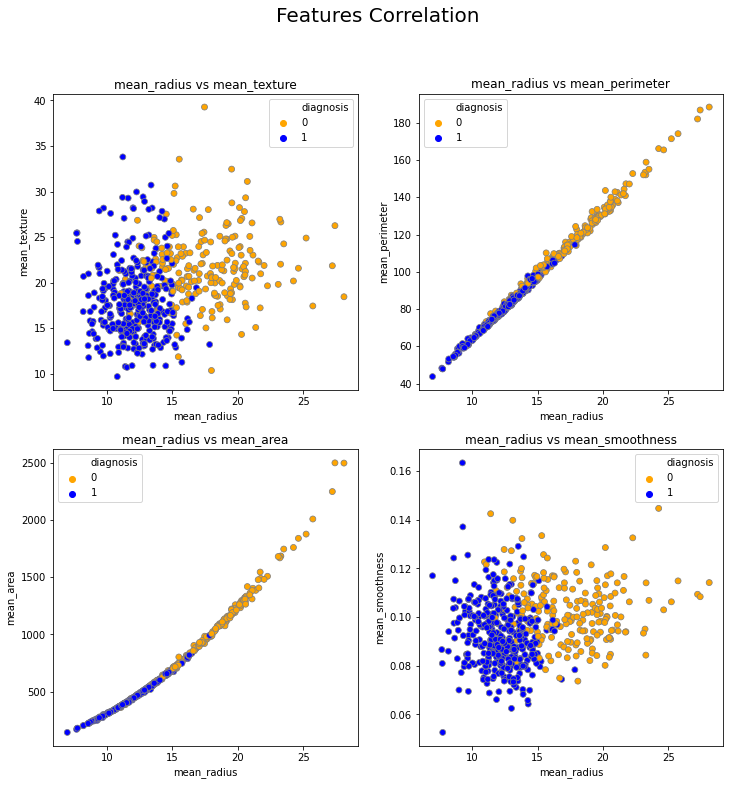

In [74]:
palette ={0 : 'orange', 1 : 'blue'}
edgecolor = 'grey'

fig = plt.figure(figsize=(12,12))

plt.subplot(221)
ax1 = sns.scatterplot(x = df_cancer['mean_radius'], y = df_cancer['mean_texture'], hue = "diagnosis",
                    data = df_cancer, palette =palette, edgecolor=edgecolor)
plt.title('mean_radius vs mean_texture')
plt.subplot(222)
ax2 = sns.scatterplot(x = df_cancer['mean_radius'], y = df_cancer['mean_perimeter'], hue = "diagnosis",
                    data = df_cancer, palette =palette, edgecolor=edgecolor)
plt.title('mean_radius vs mean_perimeter')
plt.subplot(223)
ax3 = sns.scatterplot(x = df_cancer['mean_radius'], y = df_cancer['mean_area'], hue = "diagnosis",
                    data = df_cancer, palette =palette, edgecolor=edgecolor)
plt.title('mean_radius vs mean_area')
plt.subplot(224)
ax4 = sns.scatterplot(x = df_cancer['mean_radius'], y = df_cancer['mean_smoothness'], hue = "diagnosis",
                    data = df_cancer, palette =palette, edgecolor=edgecolor)
plt.title('mean_radius vs mean_smoothness')

fig.suptitle('Features Correlation', fontsize = 20)
plt.savefig('2')
plt.show()

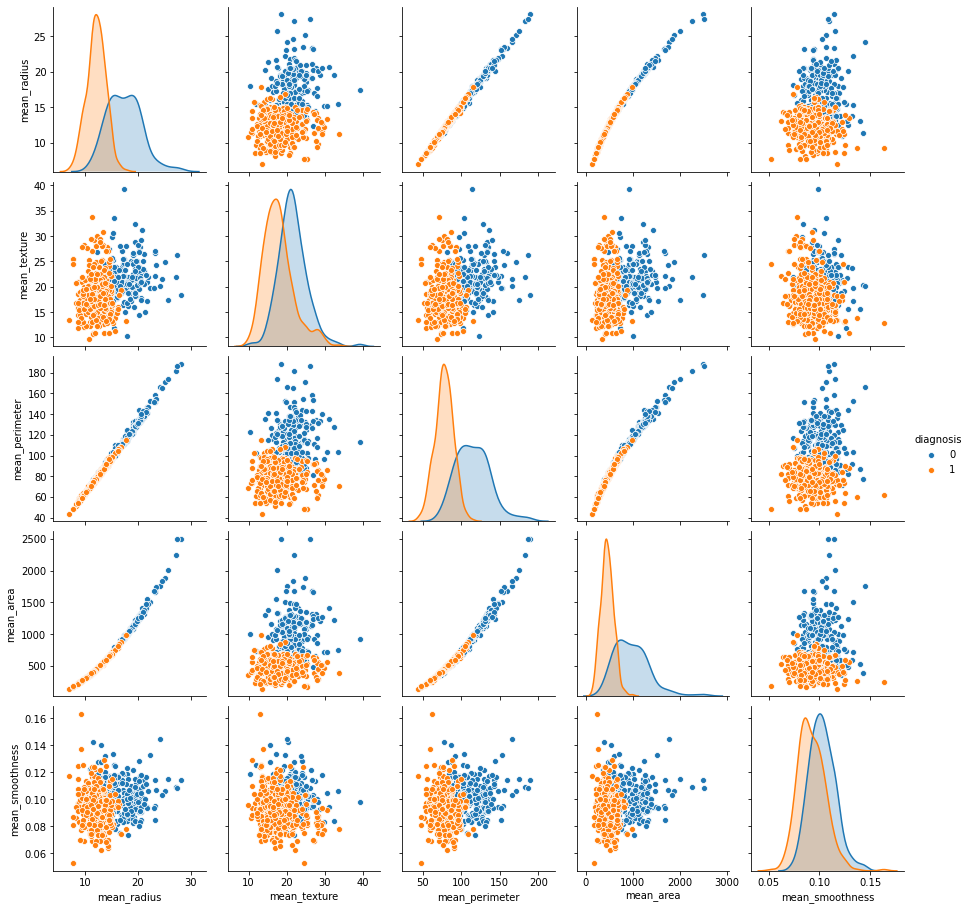

In [75]:
#visualize some of columns
sns.pairplot(df_cancer, hue = 'diagnosis')

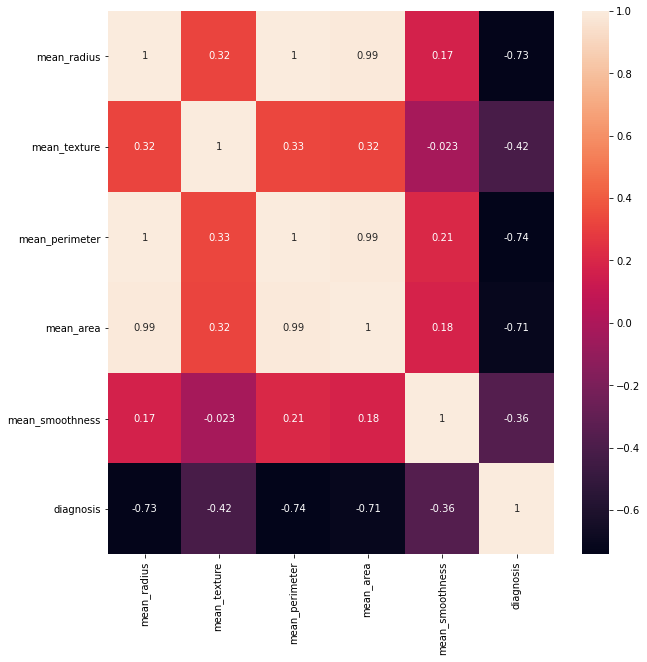

In [76]:
#correlation between different variables - some of them
plt.figure(figsize=(10,10)) 
sns.heatmap(df_cancer['mean_radius mean_texture mean_perimeter mean_area mean_smoothness diagnosis'.split()].corr(), annot=True)

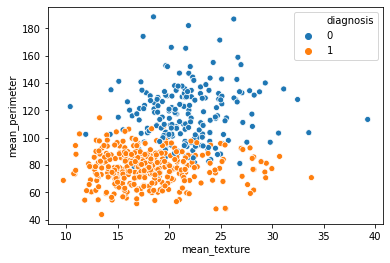

In [77]:
sns.scatterplot(x = 'mean_texture', y = 'mean_perimeter', hue = 'diagnosis', data = df_cancer)

Text(0.5, 1.0, 'number of Benign_0 vs Malignan_1')

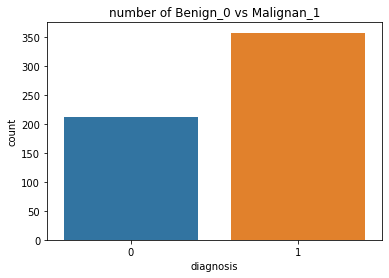

In [78]:
#visualizing number of 'benign':0,'malignant':1
sns.countplot(x='diagnosis',data = df_cancer)
plt.title('number of Benign_0 vs Malignan_1')

Text(0.5, 1.0, 'Corr. between features and target')

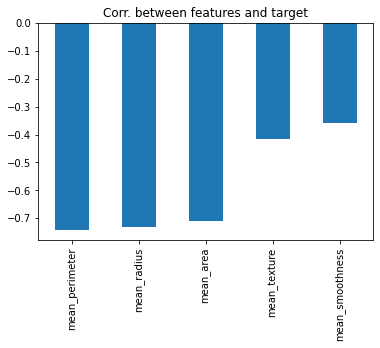

In [84]:
# correlation between features
df_cancer.corr()['diagnosis'][:-1].sort_values().plot(kind ='bar')
plt.title('Corr. between features and target')   

# **Support Vector Classification**

*   using for supervised ML and recognizing pattern used for classification
*   it is putting line between different classes and find the best line that have a certain distance from both






In [89]:
#prepare X (features) and y (target)
X = df_cancer.drop(['diagnosis'],axis=1).values
y = df_cancer['diagnosis'].values

#splitting Train and Test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (426, 5)
X_test shape: (143, 5)
y_train shape: (426,)
y_test shape: (143,)


In [91]:
#Support Vector Classification model
from sklearn.svm import SVC 

svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## ***Model Evaluation***

<Figure size 1008x1440 with 0 Axes>

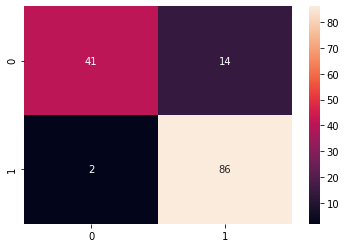

<Figure size 1008x1440 with 0 Axes>

In [96]:
from sklearn.metrics import classification_report, confusion_matrix

y_predict = svc_model.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)

In [93]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.95      0.75      0.84        55
           1       0.86      0.98      0.91        88

    accuracy                           0.89       143
   macro avg       0.91      0.86      0.88       143
weighted avg       0.90      0.89      0.88       143



In [97]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_predict)
print("Accuracy score using SVC model:", acc*100)

Accuracy score using SVC model: 88.81118881118881


# **Improving Model**

**1- Data Normalization**

Feature Scaling - brings all values into range [0,1]


X = (X - Xmin) / (Xmax - Xmin)


In [98]:
#normalized scaler - fit&transform on train, fit only on test 
from sklearn.preprocessing import MinMaxScaler
n_scaler = MinMaxScaler()
X_train_scaled = n_scaler.fit_transform(X_train.astype(np.float))
X_test_scaled = n_scaler.transform(X_test.astype(np.float))
X_train_scaled

array([[0.30280346, 0.28779168, 0.28292922, 0.16704136, 0.19888056],
       [0.27589412, 0.25160636, 0.25735448, 0.14820785, 0.29972014],
       [0.38255296, 0.26885357, 0.36398575, 0.22536585, 0.35352532],
       ...,
       [0.44468907, 0.3361515 , 0.42142408, 0.28598091, 0.35253227],
       [0.57678947, 0.39634765, 0.55279156, 0.40233298, 0.34783786],
       [0.32922354, 0.30334799, 0.31402418, 0.18133616, 0.42005958]])

In [99]:
#Support Vector Classification model
from sklearn.svm import SVC 

svc_model = SVC()
svc_model.fit(X_train_scaled, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

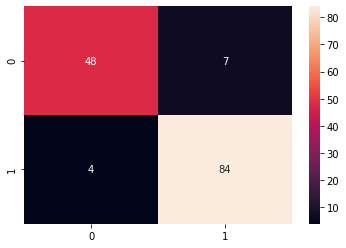

In [100]:
from sklearn.metrics import classification_report, confusion_matrix

y_predict_scaled = svc_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_predict_scaled)
sns.heatmap(cm, annot=True)

In [101]:
print(classification_report(y_test, y_predict_scaled))

              precision    recall  f1-score   support

           0       0.92      0.87      0.90        55
           1       0.92      0.95      0.94        88

    accuracy                           0.92       143
   macro avg       0.92      0.91      0.92       143
weighted avg       0.92      0.92      0.92       143



In [103]:
acc = accuracy_score(y_test, y_predict_scaled)
print("Accuracy score using SVC model with Scaled Data:", acc*100)

Accuracy score using SVC model with Scaled Data: 92.3076923076923


**2- SVM parameters optimization**

**C parameters: controls cost of missclassification on Train Data**

* Smaller C: lower variance but higher bias - soft margine - makes costs of misclassification low - less penalty
* Larger C: lower bias and higher viariance - hard margin - makes cot of misclassification high - more stricks

**gamma: free parameter for radio bases function**
* Small gamma - large variance - far reach - more generalized solution
* large gamma: is high variance and low bias - close reach - closer data point have higher weight






In [104]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1,1,10,100,1000,10000],'gamma':[1,0.1,0.01,0.001,0.001], 'kernel':['rbf']}
grid = GridSearchCV(SVC(),param_grid,verbose = 3)
grid.fit(X_train_scaled,y_train)



Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.826, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.906, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.929, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.906, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.835, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.640, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.635, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.659, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.624, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.628, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.635, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.635, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.635, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.8s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000, 10000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [105]:
grid.best_params_

{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}

In [106]:
grid.best_estimator_

SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

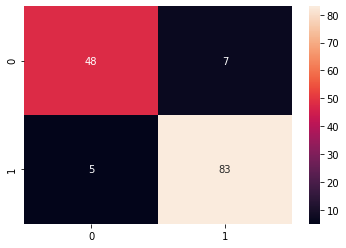

In [107]:

grid_predictions = grid.predict(X_test_scaled)
cmG = confusion_matrix(y_test,grid_predictions)
sns.heatmap(cmG, annot=True)

In [108]:

print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89        55
           1       0.92      0.94      0.93        88

    accuracy                           0.92       143
   macro avg       0.91      0.91      0.91       143
weighted avg       0.92      0.92      0.92       143



In [109]:
acc = accuracy_score(y_test, y_predict)
print("Accuracy score using SVC model (Scaled Data&grid search:", acc*100)

Accuracy score using SVC model (Scaled Data&grid search: 88.81118881118881


## **Keras - Regression**

In [111]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

X_train_scaled.shape

(426, 5)

In [113]:
model = Sequential()

model.add(Dense(5,activation='relu'))
model.add(Dense(3,activation='relu'))
# becasue of binary classification problem
model.add(Dense(1,activation='sigmoid'))

model.compile(loss = 'binary_crossentropy',optimizer='adam')

In [115]:
model.fit(x = X_train_scaled, y =y_train, epochs=600,validation_data =( X_test_scaled, y_test))

Epoch 1/600
14/14 [==============================] - 0s 13ms/step - loss: 0.6896 - val_loss: 0.6888
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6869 - val_loss: 0.6863
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6842 - val_loss: 0.6839
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6816 - val_loss: 0.6816
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6791 - val_loss: 0.6792
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6764 - val_loss: 0.6767
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6735 - val_loss: 0.6742
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6706 - val_loss: 0.6714
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6675 - val_loss: 0.6685
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6644 - val_loss: 0.6655
Epoch 11

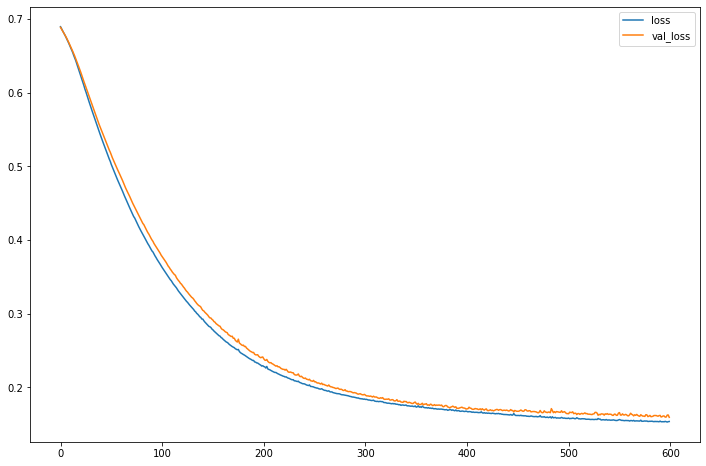

In [116]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))

In [117]:
# we might had a overfitting (when the value loss is getting better than loss itself)
# let's check if we can do something!
model = Sequential()

model.add(Dense(5,activation='relu'))
model.add(Dense(3,activation='relu'))
# becasue of binary classification problem
model.add(Dense(1,activation='sigmoid'))

model.compile(loss = 'binary_crossentropy',optimizer='adam')

In [118]:
from tensorflow.keras.callbacks import EarlyStopping


In [119]:
# when we are working with accuracy we want it max, when we are working on loss function, we want it min! (defination of Mode)
early_stop = EarlyStopping(monitor= 'val_loss', mode= 'min',verbose=1,patience=25)

In [120]:
model.fit(x = X_train_scaled, y =y_train, epochs=600,validation_data =( X_test_scaled, y_test), callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 8ms/step - loss: 0.7079 - val_loss: 0.6971
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6981 - val_loss: 0.6891
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6898 - val_loss: 0.6834
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6837 - val_loss: 0.6786
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6781 - val_loss: 0.6744
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6735 - val_loss: 0.6704
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6693 - val_loss: 0.6665
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6651 - val_loss: 0.6627
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6612 - val_loss: 0.6587
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6572 - val_loss: 0.6546
Epoch 11/

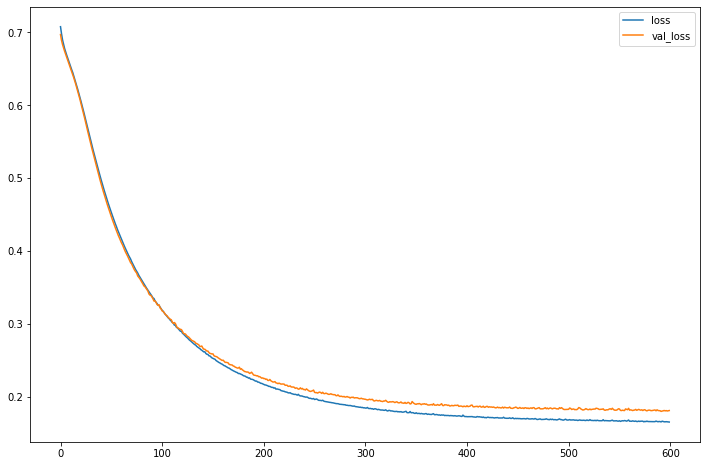

In [121]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))

In [122]:
# optimize more - drop outliers!
from tensorflow.keras.layers import Dropout


In [123]:
model = Sequential()

model.add(Dense(5,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(3,activation='relu'))
model.add(Dropout(0.5))
# becasue of binary classification problem
model.add(Dense(1,activation='sigmoid'))

model.compile(loss = 'binary_crossentropy',optimizer='adam')

In [124]:


model.fit(x = X_train_scaled, y =y_train, epochs=600,validation_data =( X_test_scaled, y_test), callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 8ms/step - loss: 0.7547 - val_loss: 0.7198
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.7538 - val_loss: 0.7151
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.7373 - val_loss: 0.7114
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.7395 - val_loss: 0.7077
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.7010 - val_loss: 0.7051
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6931 - val_loss: 0.7030
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.7058 - val_loss: 0.7007
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.7017 - val_loss: 0.6986
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6909 - val_loss: 0.6969
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6914 - val_loss: 0.6953
Epoch 11/

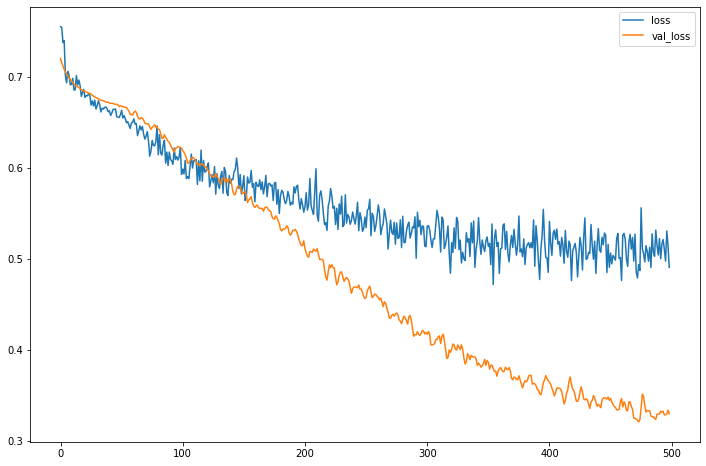

In [125]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))